In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [86]:
data = pd.read_csv("D:/Wine.txt", sep=',')
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


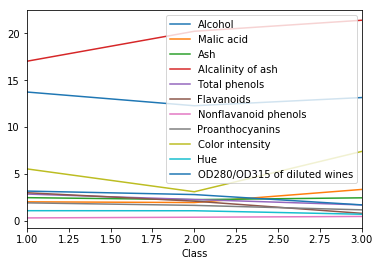

In [87]:
data.drop(['Proline ', 'Magnesium'], axis=1).groupby('Class').mean().plot()

In [88]:
target = data.Class
train_df = data.drop(['Class'], axis=1)

In [89]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df.values, target.values,
                                                     test_size=.3, random_state=17)

Best param: 3
Best score 0.9444444444444444


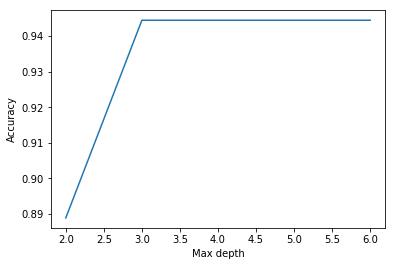

In [90]:
tree_params = list(range(2, 7))
predictions = []
for d in tree_params:
    tree = DecisionTreeClassifier(max_depth=d, random_state=17)
    tree.fit(X_train, y_train)
    tree_pred_valid = tree.predict(X_valid)
    tree_acc_valid = accuracy_score(y_valid, tree_pred_valid)
    predictions.append(tree_acc_valid)
    
plt.plot(tree_params, predictions)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
print("Best param:", np.argmax(predictions)+2)
print("Best score", np.max(predictions))

Best param: 2
Best score 0.6666666666666666


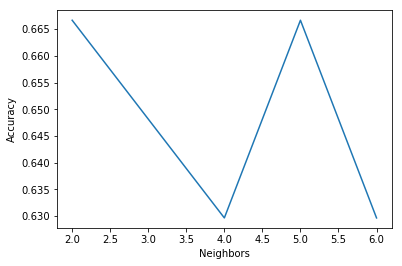

In [91]:
knn_params = list(range(2, 7))
predictions = []
for d in knn_params:
    knn = KNeighborsClassifier(n_neighbors=d)
    knn.fit(X_train, y_train)
    knn_pred_valid = knn.predict(X_valid)
    predictions.append(accuracy_score(y_valid, knn_pred_valid))
    
plt.plot(knn_params, predictions)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print("Best param:", np.argmax(predictions)+2)
print("Best score", np.max(predictions))

Best param: 2
Best score 1.0


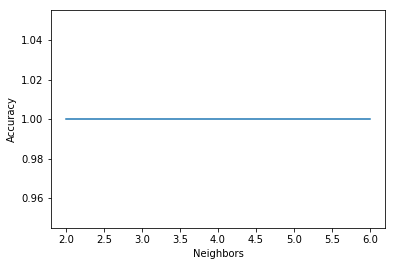

In [92]:
forest_params = list(range(2, 7))
predictions = []
for d in forest_params:
    forest = RandomForestClassifier(max_depth = d, n_estimators=100, n_jobs=-1, random_state=17)
    forest.fit(X_train, y_train)
    forest_pred_valid = forest.predict(X_valid)
    predictions.append(accuracy_score(y_valid, forest_pred_valid))
    
plt.plot(forest_params, predictions)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print("Best param:", np.argmax(predictions)+2)
print("Best score", np.max(predictions))